# 以2018 NBA球員表現數據預測球隊勝敗

### 我們在看比賽之前常常會看球員的數據來判斷覺得哪一隊會贏,可能球星這季打很差,所以就認為這隊可能會輸,因此我想要用球員的數據來預測球隊的勝敗

In [299]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', None)

## 讀球員資料 (2018-19 regular season data)

In [412]:
# data_source : https://www.kaggle.com/schmadam97/nba-regular-season-stats-20182019
df1 = pd.read_csv("NBA1.csv", encoding ='utf-8')
#第一份沒有PER所以用兩份資料
df2 = pd.read_csv("NBA2.csv", encoding='utf-8')

In [301]:
df1 = df1.rename(columns={'FULL NAME':'Name'})

In [302]:
df1.head()

,Name,TEAM,POS,AGE,GP,MPG,FTA,FT%,2PA,2P%,3PA,3P%,PPG,RPG,APG,SPG,BPG,TOPG
0,Alex Abrines,Okc,G,25.69,31,19.0,13,0.923,30,0.500,127,0.323,5.3,1.5,0.6,0.55,0.19,0.45
1,Quincy Acy,Pho,F,28.51,10,12.3,10,0.700,3,0.667,15,0.133,1.7,2.5,0.8,0.10,0.40,0.40
2,Jaylen Adams,Atl,G,22.93,34,12.6,9,0.778,36,0.361,74,0.338,3.2,1.8,1.9,0.38,0.15,0.82
3,Steven Adams,Okc,C,25.73,80,33.4,292,0.500,807,0.596,2,0.000,13.9,9.5,1.6,1.49,0.96,1.73
4,Bam Adebayo,Mia,C-F,21.73,82,23.3,226,0.735,471,0.588,15,0.200,8.9,7.3,2.2,0.88,0.79,1.48


In [303]:
df2.head()

,Name,Height,Weight,Team,Age,Salary,Points,Blocks,Steals,Assists,Rebounds,FT%,FTA,FG3%,FG3A,FG%,FGA,MP,G,PER,OWS,DWS,WS,WS48,USG,BPM,VORP
0,Alex Abrines,78,200,Oklahoma City Thunder,25,5455236,5.3,0.2,0.5,0.6,1.5,0.923,0.4,0.323,4.1,0.357,5.1,19.0,31,6.3,0.1,0.6,0.6,0.053,12.2,-3.4,-0.2
1,Quincy Acy,79,240,Phoenix Suns,28,213949,1.7,0.4,0.1,0.8,2.5,0.700,1.0,0.133,1.5,0.222,1.8,12.3,10,2.9,-0.1,0.0,-0.1,-0.022,9.2,-5.9,-0.1
2,Jaylen Adams,74,190,Atlanta Hawks,22,236854,3.2,0.1,0.4,1.9,1.8,0.778,0.3,0.338,2.2,0.345,3.2,12.6,34,7.6,-0.1,0.2,0.1,0.011,13.5,-4.4,-0.3
3,Steven Adams,84,265,Oklahoma City Thunder,25,24157304,13.9,1.0,1.5,1.6,9.5,0.500,3.7,0.000,0.0,0.595,10.1,33.4,80,18.5,5.1,4.0,9.1,0.163,16.4,2.7,3.2
4,Bam Adebayo,82,255,Miami Heat,21,2955840,8.9,0.8,0.9,2.2,7.3,0.735,2.8,0.200,0.2,0.576,5.9,23.3,82,17.9,3.4,3.4,6.8,0.171,15.8,3.0,2.4


## 合併兩表

In [304]:
res = pd.merge(df1,df2, on='Name')

In [305]:
res.head()

,Name,TEAM,POS,AGE,GP,MPG,FTA_x,FT%_x,2PA,2P%,3PA,3P%,PPG,RPG,APG,SPG,BPG,TOPG,Height,Weight,Team,Age,Salary,Points,Blocks,Steals,Assists,Rebounds,FT%_y,FTA_y,FG3%,FG3A,FG%,FGA,MP,G,PER,OWS,DWS,WS,WS48,USG,BPM,VORP
0,Alex Abrines,Okc,G,25.69,31,19.0,13,0.923,30,0.500,127,0.323,5.3,1.5,0.6,0.55,0.19,0.45,78,200,Oklahoma City Thunder,25,5455236,5.3,0.2,0.5,0.6,1.5,0.923,0.4,0.323,4.1,0.357,5.1,19.0,31,6.3,0.1,0.6,0.6,0.053,12.2,-3.4,-0.2
1,Quincy Acy,Pho,F,28.51,10,12.3,10,0.700,3,0.667,15,0.133,1.7,2.5,0.8,0.10,0.40,0.40,79,240,Phoenix Suns,28,213949,1.7,0.4,0.1,0.8,2.5,0.700,1.0,0.133,1.5,0.222,1.8,12.3,10,2.9,-0.1,0.0,-0.1,-0.022,9.2,-5.9,-0.1
2,Jaylen Adams,Atl,G,22.93,34,12.6,9,0.778,36,0.361,74,0.338,3.2,1.8,1.9,0.38,0.15,0.82,74,190,Atlanta Hawks,22,236854,3.2,0.1,0.4,1.9,1.8,0.778,0.3,0.338,2.2,0.345,3.2,12.6,34,7.6,-0.1,0.2,0.1,0.011,13.5,-4.4,-0.3
3,Steven Adams,Okc,C,25.73,80,33.4,292,0.500,807,0.596,2,0.000,13.9,9.5,1.6,1.49,0.96,1.73,84,265,Oklahoma City Thunder,25,24157304,13.9,1.0,1.5,1.6,9.5,0.500,3.7,0.000,0.0,0.595,10.1,33.4,80,18.5,5.1,4.0,9.1,0.163,16.4,2.7,3.2
4,Bam Adebayo,Mia,C-F,21.73,82,23.3,226,0.735,471,0.588,15,0.200,8.9,7.3,2.2,0.88,0.79,1.48,82,255,Miami Heat,21,2955840,8.9,0.8,0.9,2.2,7.3,0.735,2.8,0.200,0.2,0.576,5.9,23.3,82,17.9,3.4,3.4,6.8,0.171,15.8,3.0,2.4


## 檢查

In [306]:
res.describe()

,AGE,GP,MPG,FTA_x,FT%_x,2PA,2P%,3PA,3P%,PPG,RPG,APG,SPG,BPG,TOPG,Height,Weight,Age,Points,Blocks,Steals,Assists,Rebounds,FT%_y,FTA_y,FG3%,FG3A,FG%,FGA,MP,G,PER,OWS,DWS,WS,WS48,USG,BPM,VORP
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,560.000000,583.000000,549.000000,583.000000,581.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,26.835523,43.202401,19.583533,95.308748,0.698079,236.622642,0.485593,130.838765,0.294897,8.652144,3.655060,1.922642,0.612539,0.387719,1.069022,79.037736,217.915952,26.102916,8.715094,0.390738,0.621612,1.936021,3.689880,0.740348,1.821441,0.315209,2.582161,0.443764,7.117839,19.744597,50.512864,13.153002,1.192967,1.142024,2.336364,0.077756,18.667067,-1.810635,0.529846
std,4.164629,26.395684,9.077895,118.435277,0.221025,255.945491,0.134390,149.558703,0.156840,6.021322,2.546172,1.729480,0.423898,0.401772,0.783697,3.338099,23.875208,4.174012,5.897272,0.391512,0.403906,1.706065,2.501391,0.140152,1.591797,0.129306,2.050075,0.098941,4.436775,8.773055,24.945220,6.817638,1.800573,1.075469,2.658905,0.109751,5.422206,4.689352,1.288557
min,19.420000,1.000000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000,166.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,1.000000,-38.100000,-2.800000,-0.500000,-1.700000,-0.946000,0.000000,-52.300000,-2.200000
25%,23.515000,19.000000,12.600000,16.000000,0.659000,41.500000,0.452500,15.000000,0.256000,4.200000,1.850000,0.800000,0.320000,0.120000,0.525000,77.000000,200.000000,23.000000,4.300000,0.100000,0.300000,0.800000,1.900000,0.684000,0.800000,0.291000,1.000000,0.402000,3.900000,12.900000,30.000000,9.800000,0.000000,0.300000,0.300000,0.038000,15.050000,-3.600000,-0.100000
50%,26.330000,44.000000,19.600000,51.000000,0.750000,150.000000,0.500000,79.000000,0.333000,7.300000,3.100000,1.300000,0.540000,0.270000,0.880000,79.000000,215.000000,26.000000,7.300000,0.300000,0.500000,1.400000,3.100000,0.763000,1.300000,0.336000,2.300000,0.435000,6.200000,19.400000,57.000000,12.600000,0.500000,0.900000,1.500000,0.082000,17.800000,-1.600000,0.100000
75%,29.570000,68.000000,27.300000,124.000000,0.821500,330.000000,0.549500,200.000000,0.369000,11.800000,4.700000,2.500000,0.845000,0.510000,1.450000,82.000000,235.000000,29.000000,11.550000,0.500000,0.800000,2.500000,4.700000,0.824000,2.400000,0.370000,3.800000,0.487000,9.550000,27.150000,72.000000,16.450000,1.900000,1.600000,3.300000,0.121000,21.800000,0.300000,0.750000
max,42.210000,82.000000,36.900000,858.000000,1.000000,1277.000000,1.000000,1028.000000,1.000000,36.100000,15.600000,10.700000,2.400000,2.690000,4.960000,87.000000,290.000000,42.000000,36.100000,2.700000,2.200000,10.700000,15.600000,1.000000,11.000000,1.000000,13.200000,1.000000,24.500000,36.900000,82.000000,80.400000,11.400000,5.900000,15.200000,1.261000,47.200000,14.900000,9.900000


In [307]:
res.isnull().sum()

Name         0
TEAM         0
POS          0
AGE          0
GP           0
MPG          0
FTA_x        0
FT%_x        0
2PA          0
2P%          0
3PA          0
3P%          0
PPG          0
RPG          0
APG          0
SPG          0
BPG          0
TOPG         0
Height       0
Weight       0
Team        47
Age          0
Salary       0
Points       0
Blocks       0
Steals       0
Assists      0
Rebounds     0
FT%_y       23
FTA_y        0
FG3%        34
FG3A         0
FG%          2
FGA          0
MP           0
G            0
PER          0
OWS          0
DWS          0
WS           0
WS48         0
USG          0
BPM          0
VORP         0
dtype: int64

In [308]:
#以平均值補上FG%, 其餘皆為重複資料可直接刪除該欄
res['FG%'] = res['FG%'].fillna(res['FG%'].mean())

In [309]:
#取需要的欄位
'''
GP : game played
MPG : minute per game
FTA_x : free throw attempted
FT%_x : free throw percentage
FGA : field goal attempted
FG% : field goal percentage
2PA : two point attempted
2P% : two point percentage
3PA : three point attempted
3P% : three point percentage
PPG : Point Per game
RPG : Rebound Per game
APG : Assist Per game
SPG : steal per game
BPG : block per game
TOPG : Turnover Per Game
PER : 球員效率
'''
res = res[['Name','TEAM','AGE','GP','MPG','FTA_x','FT%_x','FGA','FG%','2PA','2P%','3PA','3P%','PPG','RPG','APG','SPG','BPG','TOPG','PER']]
res.head()

,Name,TEAM,AGE,GP,MPG,FTA_x,FT%_x,FGA,FG%,2PA,2P%,3PA,3P%,PPG,RPG,APG,SPG,BPG,TOPG,PER
0,Alex Abrines,Okc,25.69,31,19.0,13,0.923,5.1,0.357,30,0.500,127,0.323,5.3,1.5,0.6,0.55,0.19,0.45,6.3
1,Quincy Acy,Pho,28.51,10,12.3,10,0.700,1.8,0.222,3,0.667,15,0.133,1.7,2.5,0.8,0.10,0.40,0.40,2.9
2,Jaylen Adams,Atl,22.93,34,12.6,9,0.778,3.2,0.345,36,0.361,74,0.338,3.2,1.8,1.9,0.38,0.15,0.82,7.6
3,Steven Adams,Okc,25.73,80,33.4,292,0.500,10.1,0.595,807,0.596,2,0.000,13.9,9.5,1.6,1.49,0.96,1.73,18.5
4,Bam Adebayo,Mia,21.73,82,23.3,226,0.735,5.9,0.576,471,0.588,15,0.200,8.9,7.3,2.2,0.88,0.79,1.48,17.9


## 產生進階數據

In [310]:
#數據轉換

# 將整季資料轉為平均
res['FTAPG'] = res['FTA_x']/res['GP']
res['3PAPG'] = res['3PA']/res['GP']
res['2PAPG'] = res['2PA']/res['GP']
res['3PMPG'] = res['3PAPG']*res['3P%']
res['2PMPG'] = res['2PAPG']*res['2P%']

# 產生FGMPG = FGAxFG%
res['FGMPG'] = (res['FGA']*res['FG%'])

# 產生FTMPG = FTAxFT%
res['FTMPG'] = (res['FTAPG']*res['FT%_x'])

res = res.drop(['FTA_x', '3PA', '2PA'], axis=1)

res.head()

,Name,TEAM,AGE,GP,MPG,FT%_x,FGA,FG%,2P%,3P%,PPG,RPG,APG,SPG,BPG,TOPG,PER,FTAPG,3PAPG,2PAPG,3PMPG,2PMPG,FGMPG,FTMPG
0,Alex Abrines,Okc,25.69,31,19.0,0.923,5.1,0.357,0.500,0.323,5.3,1.5,0.6,0.55,0.19,0.45,6.3,0.419355,4.096774,0.967742,1.323258,0.483871,1.8207,0.387065
1,Quincy Acy,Pho,28.51,10,12.3,0.700,1.8,0.222,0.667,0.133,1.7,2.5,0.8,0.10,0.40,0.40,2.9,1.000000,1.500000,0.300000,0.199500,0.200100,0.3996,0.700000
2,Jaylen Adams,Atl,22.93,34,12.6,0.778,3.2,0.345,0.361,0.338,3.2,1.8,1.9,0.38,0.15,0.82,7.6,0.264706,2.176471,1.058824,0.735647,0.382235,1.1040,0.205941
3,Steven Adams,Okc,25.73,80,33.4,0.500,10.1,0.595,0.596,0.000,13.9,9.5,1.6,1.49,0.96,1.73,18.5,3.650000,0.025000,10.087500,0.000000,6.012150,6.0095,1.825000
4,Bam Adebayo,Mia,21.73,82,23.3,0.735,5.9,0.576,0.588,0.200,8.9,7.3,2.2,0.88,0.79,1.48,17.9,2.756098,0.182927,5.743902,0.036585,3.377415,3.3984,2.025732


In [311]:
# EFF(Efficiency) 效率值
## EFF = (PTS + TREB + AST + STL + BLK) - (FGA - FGM) - (FTA - FTM) - TO 
res['EFF'] = (res['PPG']+res['RPG']+res['APG']+res['SPG']+res['BPG'])-(res['FGA']-res['FGMPG'])-(res['FTAPG']-res['FTMPG'])-res['TOPG']

#GmSc 貢獻值
#GmSc = (PTS + REB + 0.7×AST + STL + 0.7×BLK) + 0.4×FGM - 0.7×FGA - 0.4×(FTA-FTM) - TOV 
res['Gmsc'] = (res['PPG']+res['RPG']+0.7*res['APG']+res['SPG']+0.7*res['BPG'])+0.4*res['FGMPG']-0.7*res['FGA']-0.4*res['FTAPG']+0.4*res['FTMPG']-res['TOPG']

#eFG%(effective Field Goal percentage) 有效命中率
#eFG% = (FGM+0.5*3PM)/FGA
res['eFG%'] = (res['FGMPG']+0.5*res['3PMPG'])/res['FGA']

#TS%(True Shooting percentage) 真實命中率
res['TS%'] = (res['FGMPG']+0.5*res['3PMPG'])/2*(res['FGA']+0.44*res['FTAPG'])

#Poss 球隊進攻節奏
#Poss = FGA + 0.44×FTA - REB + TOV 
res['Poss'] = res['FGA']+0.44*res['FTAPG']-res['RPG']+res['TOPG']

res = res.fillna(0)

## 匯入2k資料並合併

### 遊戲公司2k每年發行的nba 2k籃球遊戲會給每個球員評比,也很多人會在賽季開打前用2k模擬誰會進季後賽、拿總冠軍等等

In [312]:
# data source : https://forums.operationsports.com/forums/nba-2k-basketball-rosters/911151-nba-2k-player-ratings-website-database-excel-spreadsheet.html
twok = pd.read_csv("Ratings.csv") 
twok = twok.drop('Unnamed: 0', axis =1)
twok = twok.rename(columns={'name':'Name'})
#以名字合併
res = pd.merge(res,twok, on='Name')
res.head()

,Name,TEAM,AGE,GP,MPG,FT%_x,FGA,FG%,2P%,3P%,PPG,RPG,APG,SPG,BPG,TOPG,PER,FTAPG,3PAPG,2PAPG,3PMPG,2PMPG,FGMPG,FTMPG,EFF,Gmsc,eFG%,TS%,Poss,ratings
0,Jaylen Adams,Atl,22.93,34,12.6,0.778,3.2,0.345,0.361,0.338,3.2,1.8,1.9,0.38,0.15,0.82,7.6,0.264706,2.176471,1.058824,0.735647,0.382235,1.1040,0.205941,4.455235,4.173094,0.459945,2.440630,2.336471,69
1,Steven Adams,Okc,25.73,80,33.4,0.500,10.1,0.595,0.596,0.000,13.9,9.5,1.6,1.49,0.96,1.73,18.5,3.650000,0.025000,10.087500,0.000000,6.012150,6.0095,1.825000,19.804500,19.555800,0.595000,35.173603,3.936000,84
2,Bam Adebayo,Mia,21.73,82,23.3,0.735,5.9,0.576,0.588,0.200,8.9,7.3,2.2,0.88,0.79,1.48,17.9,2.756098,0.182927,5.743902,0.036585,3.377415,3.3984,2.025732,15.358034,14.630214,0.579100,12.150926,1.292683,79
3,Deng Adel,Cle,22.19,19,10.2,1.000,1.9,0.306,0.385,0.261,1.7,1.0,0.3,0.05,0.21,0.32,2.7,0.210526,1.210526,0.684211,0.315947,0.263421,0.5814,0.210526,1.621400,1.689560,0.389144,0.736650,1.312632,66
4,LaMarcus Aldridge,San,33.73,81,33.2,0.847,16.3,0.519,0.528,0.238,21.3,9.2,2.4,0.54,1.32,1.78,22.9,5.086420,0.518519,15.765432,0.123407,8.324148,8.4597,4.308198,24.361478,23.526591,0.522786,78.984996,11.118025,88


## 以隊伍取平均，取得隊伍數據

In [313]:
team = res.groupby(res['TEAM']).mean()

In [314]:
team = team.drop(['GP','MPG','FT%_x','FGA','FG%','2P%','3P%'], axis=1)
team.head()

,AGE,PPG,RPG,APG,SPG,BPG,TOPG,PER,FTAPG,3PAPG,2PAPG,3PMPG,2PMPG,FGMPG,FTMPG,EFF,Gmsc,eFG%,TS%,Poss,ratings
TEAM,,,,,,,,,,,,,,,,,,,,,
Atl,26.102500,8.937500,3.831250,1.925000,0.602500,0.435000,1.237500,13.768750,1.922824,2.841613,4.249894,1.002247,2.253851,3.303263,1.427512,10.089201,9.860180,0.534661,19.536320,5.464792,74.437500
Bos,26.791538,9.176923,3.592308,2.292308,0.703846,0.418462,1.026154,15.146154,1.572201,2.653483,4.716904,0.964731,2.508839,3.518623,1.257474,10.853897,10.370636,0.530135,22.829288,5.633307,78.076923
Bro,26.256250,8.368750,3.900000,1.568750,0.509375,0.322500,1.044375,13.837500,2.028867,2.746546,3.969107,0.915025,2.069640,3.123894,1.483175,9.246952,9.219531,0.516049,16.586896,4.993326,75.250000
Cha,26.718125,8.618750,3.512500,1.781250,0.536250,0.386250,0.920000,13.475000,1.890629,2.463378,4.747666,0.821826,2.346239,3.315675,1.456821,9.365617,9.215622,0.494695,20.150999,5.670627,75.687500
Chi,24.499412,10.517647,4.500000,1.864706,0.697647,0.428235,1.258824,13.223529,2.123869,2.631584,6.070566,0.917276,3.050226,3.916535,1.661544,11.644798,11.452037,0.505899,26.406662,6.252150,74.058824


# 讀入比賽數據

In [318]:
# data source : https://www.basketball-reference.com/leagues/NBA_2019_games.html
game = pd.read_csv("game.csv")
game['Home Team'] = game['Home Team'].str.slice(0,3)
game['Away Team'] = game['Away Team'].str.slice(0,3)
game.head()

,Round Number,Date,Location,Home Team,Away Team,Result
0,1,16/10/2018 20:00,TD Garden,Bos,Phi,105 - 87
1,1,16/10/2018 22:30,ORACLE Arena,Gol,Okl,108 - 100
2,1,17/10/2018 19:00,Spectrum Center,Cha,Mil,112 - 113
3,1,17/10/2018 19:00,Little Caesars Arena,Det,Bro,103 - 100
4,1,17/10/2018 19:00,Bankers Life Fieldhouse,Ind,Mem,111 - 83


## 看name哪些不對然後replace

In [319]:
set(game['Home Team'])

{'Atl',
 'Bos',
 'Bro',
 'Cha',
 'Chi',
 'Cle',
 'Dal',
 'Den',
 'Det',
 'Gol',
 'Hou',
 'Ind',
 'LA ',
 'Los',
 'Mem',
 'Mia',
 'Mil',
 'Min',
 'New',
 'Nor',
 'Okl',
 'Orl',
 'Phi',
 'Pho',
 'Por',
 'Sac',
 'San',
 'Tor',
 'Uta',
 'Was'}

In [320]:
game['Away Team'] = game['Away Team'].replace({"LA ":"Lac","Los":"Lal","New":"Nyk","Okl":"Okc"})
game['Home Team'] = game['Home Team'].replace({"LA ":"Lac","Los":"Lal","New":"Nyk","Okl":"Okc"})
game.head()

,Round Number,Date,Location,Home Team,Away Team,Result
0,1,16/10/2018 20:00,TD Garden,Bos,Phi,105 - 87
1,1,16/10/2018 22:30,ORACLE Arena,Gol,Okc,108 - 100
2,1,17/10/2018 19:00,Spectrum Center,Cha,Mil,112 - 113
3,1,17/10/2018 19:00,Little Caesars Arena,Det,Bro,103 - 100
4,1,17/10/2018 19:00,Bankers Life Fieldhouse,Ind,Mem,111 - 83


## 取需要的欄位以及分數轉換

In [321]:
game = game[['Home Team','Away Team','Result']]
game['Home'] = game['Result'].str.slice(0,3)
game['Away'] = game['Result'].str.slice(5)
game.head()

,Home Team,Away Team,Result,Home,Away
0,Bos,Phi,105 - 87,105,87
1,Gol,Okc,108 - 100,108,100
2,Cha,Mil,112 - 113,112,113
3,Det,Bro,103 - 100,103,100
4,Ind,Mem,111 - 83,111,83


## 取得勝負label, 1:主場勝 0:客場勝

In [322]:
label=[]
for row,index in game.iterrows():
    label.append(1 if (int(index['Home']) - int(index['Away']))>0 else 0)
game['label'] = label
game.head()

,Home Team,Away Team,Result,Home,Away,label
0,Bos,Phi,105 - 87,105,87,1
1,Gol,Okc,108 - 100,108,100,1
2,Cha,Mil,112 - 113,112,113,0
3,Det,Bro,103 - 100,103,100,1
4,Ind,Mem,111 - 83,111,83,1


## 將features合併,以主場數據減掉客場數據

In [323]:
result = []
for row,index in game.iterrows():
    x = np.array(team.loc[index['Home Team']] - team.loc[index['Away Team']])
    result = np.append(result,x)
#to dataframe
result = np.reshape(result,(1230,21))

In [324]:
X = pd.DataFrame(result, columns=list(team))
y = label

In [325]:
X.head()

,AGE,PPG,RPG,APG,SPG,BPG,TOPG,PER,FTAPG,3PAPG,2PAPG,3PMPG,2PMPG,FGMPG,FTMPG,EFF,Gmsc,eFG%,TS%,Poss,ratings
0,0.551104,-0.040468,-0.616388,0.218395,0.001237,-0.029799,-0.115151,1.924415,-0.534796,0.149222,-0.075099,0.093359,0.009024,0.301945,-0.342679,-0.339416,-0.547950,0.017380,2.644821,0.747532,1.989967
1,2.042390,0.861397,0.357721,0.559191,-0.061875,0.201287,0.133566,6.172059,-0.138081,0.082901,-0.113768,0.166463,0.164582,0.180528,0.026507,2.477431,1.937770,0.103228,-0.124868,-0.633072,2.996324
2,-0.356161,0.323512,-0.373214,-0.137798,-0.003750,-0.031369,-0.049048,-2.505952,0.292723,-0.450733,1.069735,-0.200814,0.344198,0.016142,0.237345,-0.567867,-0.387057,-0.044892,-0.376324,0.808024,-0.122024
3,1.278750,-0.024306,-0.266667,0.159028,0.027292,-0.013056,-0.093819,-1.465278,-0.255977,0.245489,-0.031486,0.118631,-0.130744,-0.211449,-0.108654,0.101568,0.039377,-0.046981,2.361897,-0.129366,-1.027778
4,-0.434762,-0.090476,-0.464286,-0.007143,0.007619,-0.100952,-0.098571,1.061905,-0.127172,-0.214829,-0.072113,0.049054,-0.046089,0.426795,-0.149051,-0.689846,-0.738938,0.013902,5.320047,0.847854,2.380952


In [326]:
y[:5]

[1, 1, 0, 1, 1]

## Decission Tree

In [398]:
from sklearn import tree
from sklearn.metrics import classification_report

# 建立分類器
X_train, X_test, y_train, y_test = train_test_split(X*10, y, test_size=0.25)
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)
NBA_clf = clf.fit(X_train, y_train)

# 預測
y_test_predicted = NBA_clf.predict(X_test)

NBA_clf.score(X_test,y_test)
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.65      0.45      0.53       123
           1       0.70      0.84      0.76       185

    accuracy                           0.69       308
   macro avg       0.68      0.65      0.65       308
weighted avg       0.68      0.69      0.67       308



In [399]:
data_feature_name = list(team)
data_target_name = ['0','1']
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from IPython.display import Image

dot_tree = tree.export_graphviz(NBA_clf,out_file=None,feature_names=data_feature_name,class_names=data_target_name,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_tree)
img = Image(graph.create_png())
#graph.write_png("out.png")

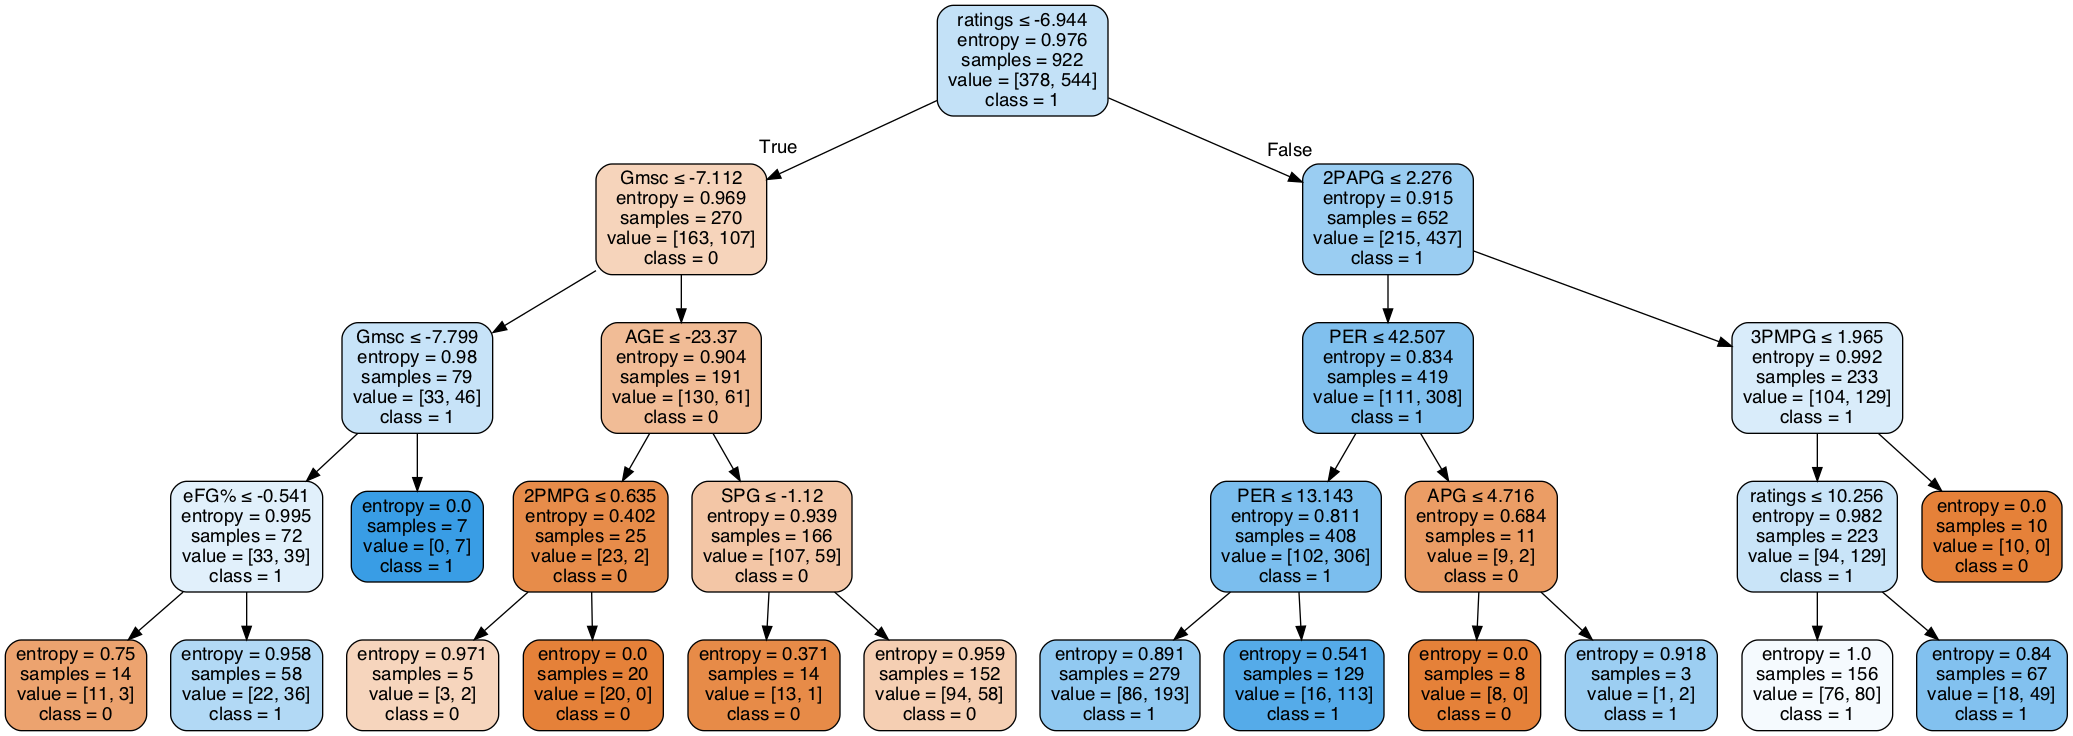

In [400]:
img

In [401]:
ranking = team[['ratings']].sort_values('ratings')
ranking

,ratings
TEAM,
Orl,74.000000
Nyk,74.000000
Chi,74.058824
Det,74.222222
Cle,74.238095
Mem,74.333333
Atl,74.437500
Lal,74.736842
Pho,74.777778


In [402]:
pd.DataFrame({'ranking' : np.arange(1,16),
                    'east' : ['Bos','Tor','Ind','Phi','Mil','Was','Mia','Cha','Bro','Atl','Cle','Det','Chi','Nyk','Orl'],
                    'west' : ['Gol','Den','Hou','Lac','San','Uta','Por','Min','Sac','Nor','Okc','Dal','Pho','Lal','Mem']})

,ranking,east,west
0,1,Bos,Gol
1,2,Tor,Den
2,3,Ind,Hou
3,4,Phi,Lac
4,5,Mil,San
5,6,Was,Uta
6,7,Mia,Por
7,8,Cha,Min
8,9,Bro,Sac
9,10,Atl,Nor


In [403]:
game['predict'] = NBA_clf.predict(X*10)

In [404]:
from collections import defaultdict

def zero():
    return 0

multi_dict = defaultdict(zero) 

for row,index in game.iterrows():
    if index['predict'] == 1:
        multi_dict[index['Home Team']] +=1
    else :
        multi_dict[index['Away Team']] +=1

In [405]:
multi_dict

defaultdict(<function __main__.zero()>,
            {'Bos': 68,
             'Gol': 63,
             'Cha': 54,
             'Bro': 48,
             'Ind': 55,
             'Mia': 46,
             'Nyk': 14,
             'Tor': 56,
             'Hou': 54,
             'San': 61,
             'Sac': 44,
             'Lac': 62,
             'Pho': 27,
             'Phi': 47,
             'Was': 37,
             'Por': 55,
             'Mem': 13,
             'Min': 32,
             'Nor': 28,
             'Mil': 54,
             'Uta': 53,
             'Chi': 11,
             'Dal': 31,
             'Den': 62,
             'Cle': 21,
             'Okc': 51,
             'Det': 23,
             'Atl': 20,
             'Lal': 22,
             'Orl': 18})

In [411]:
pd.DataFrame({'ranking' : np.arange(1,16),
                    'east' : ['Bos','Tor','Ind','Cha','Mil','Bro','Phi','Mia','Was','Det','Cle','Atl','Orl','Nyk','Chi'],
                    'west' : ['Gol','Lac','Den','San','Por','Hou','Por','Min','Sac','Min','Dal','Nor','Pho','Lal','Mem']})

,ranking,east,west
0,1,Bos,Gol
1,2,Tor,Lac
2,3,Ind,Den
3,4,Cha,San
4,5,Mil,Por
5,6,Bro,Hou
6,7,Phi,Por
7,8,Mia,Min
8,9,Was,Sac
9,10,Det,Min


In [414]:
X_new = X[['EFF','Gmsc','eFG%','TS%','Poss','ratings']]

In [415]:
# 建立分類器
X_train, X_test, y_train, y_test = train_test_split(X_new*10, y, test_size=0.25)
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)
NBA_clf = clf.fit(X_train, y_train)

# 預測
y_test_predicted = NBA_clf.predict(X_test)

NBA_clf.score(X_test,y_test)
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.53      0.33      0.41       115
           1       0.67      0.82      0.74       193

    accuracy                           0.64       308
   macro avg       0.60      0.58      0.57       308
weighted avg       0.62      0.64      0.62       308



In [419]:
data_feature_name = list(X_new)
data_target_name = ['0','1']

dot_tree = tree.export_graphviz(NBA_clf,out_file=None,feature_names=data_feature_name,class_names=data_target_name,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_tree)
img = Image(graph.create_png())
#graph.write_png("out.png")

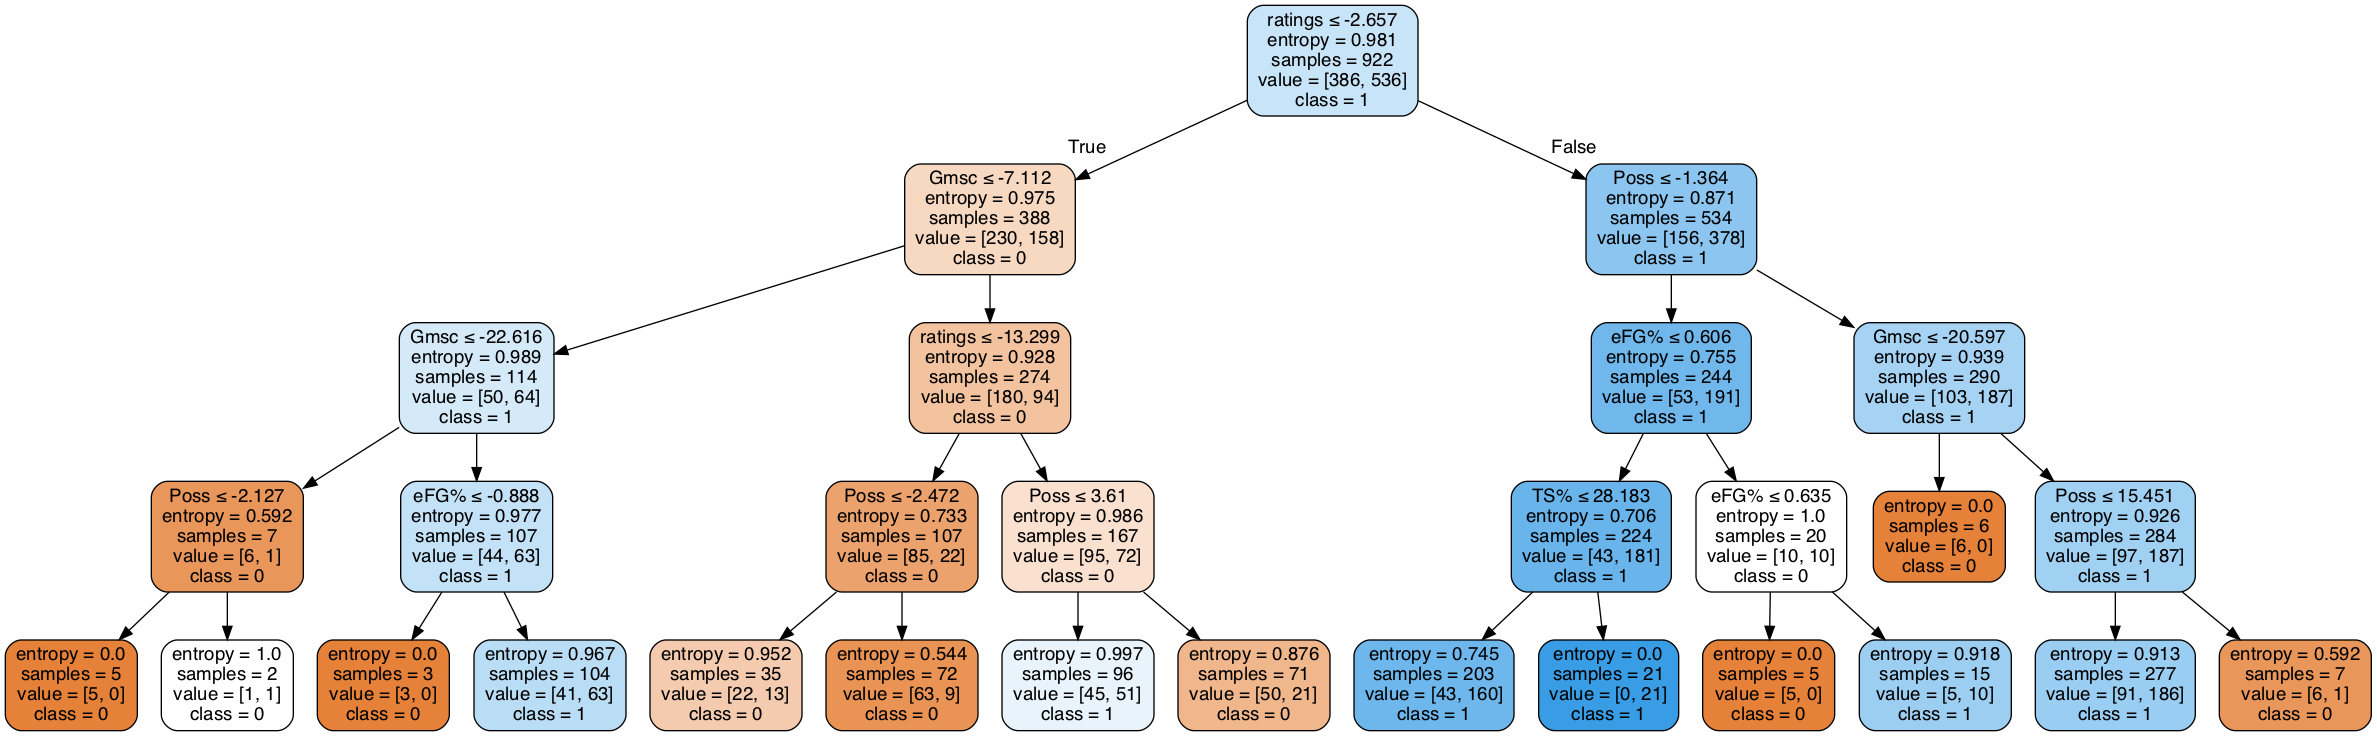

In [420]:
img